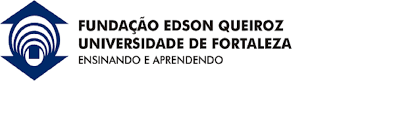

# MINERAÇÃO DE TEXTOS E DA WEB

## ATIVIDADE 01

#### GRUPO 02:
- Agenor Júnior
- Nicole Wirtzbiki
- Torricelli Evangelista

------------------------------------------------------------------------------------------------------------------
INICIO ATIVIDADE 01 - Pré-processamento dos textos

- Tokenização
- Lematização
- POS Tagging
- Normalização
- Chunking
- NER (entidades nomeadas)
- Remoção stop-words

### IMPORTANTO PACOTES NECESSÁRIOS

In [375]:
import nltk
#nltk.download('punkt')
#nltk.download('average_perceptron_tagger')
#nltk.download('wordnet')
from nltk.corpus import stopwords
language = "english"
from nltk.corpus import wordnet as wn
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams

from contextlib import redirect_stdout
import os
#with redirect_stdout(open(os.devnull, "w")):
    #nltk.download('averaged_perceptron_tagger')

# 1 - Abertura do arquivo para tratamento dos dados.

In [376]:
import pandas as pd

#leitura para objeto dataframe
tweets = pd.read_csv('/home/nico/Área de Trabalho/MineracaoDadosWeb/entrega 2/olid-training-v1.0.tsv', sep='\t',encoding= 'utf-8')

#conversão da coluna 'id' de inteiro para string
tweets['id'] = tweets['id'].astype('str')

#visualização dos primeiros registros
tweets = tweets[['subtask_c','subtask_b','subtask_a','id','tweet']]
tweets.head(10)

,subtask_c,subtask_b,subtask_a,id,tweet
0,NaN,UNT,OFF,86426,@USER She should ask a few native Americans wh...
1,IND,TIN,OFF,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...
2,NaN,NaN,NOT,16820,Amazon is investigating Chinese employees who ...
3,NaN,UNT,OFF,62688,"@USER Someone should'veTaken"" this piece of sh..."
4,NaN,NaN,NOT,43605,@USER @USER Obama wanted liberals &amp; illega...
5,OTH,TIN,OFF,97670,@USER Liberals are all Kookoo !!!
6,NaN,UNT,OFF,77444,@USER @USER Oh noes! Tough shit.
7,GRP,TIN,OFF,52415,@USER was literally just talking about this lo...
8,NaN,NaN,NOT,45157,@USER Buy more icecream!!!
9,IND,TIN,OFF,13384,@USER Canada doesn’t need another CUCK! We alr...


### 1.1- Uso da função "print()" para visualizar o arquivo na sua forma bruta.
O arquivo corresponde a uma lista contendo 13240 strings. Cada string representa um tweet.

In [377]:
#print(tweets) # Imprime uma lista com 13240 strings.

--------------------------------------------------------------------------------------------------------

# 2 - Normalização

entrada: tweet  |  saída: tweet_normalizado

In [378]:
import re # Importando o módulo "REGEX" para expressões regulares.

In [379]:
def normalizacao_texto(tweet):
    
    #Normalização de todas as palavras para caixa baixa
    tweet = tweet.lower() 
    
    #Pela importância de manter pelo menos uma ocorrência de "@user" 
    #em cada tweet, foram removidas apenas suas repetições.
    #tweet = re.sub('(@user |@user| @user )+',' @user ',tweet)
    
    #remove as menções a usuários de cada tweet
    tweet = re.sub(r'@user', '', tweet, flags=re.MULTILINE)
    
    #Remoção de repetições seguidas de acentuações para não 
    #perder o sentido durante a análise do contexto dos tweets
    tweet = re.sub('(!)+','!',tweet)
    tweet = re.sub('(")+','"',tweet)
    tweet = re.sub('(\.)+','.',tweet)
    
    #Remoção de todas as palavras que começam com "#"
    tweet = re.sub(r"#(\w+)", ' ', tweet, flags=re.MULTILINE)
      
    #remove as palavras url
    tweet = re.sub(r'url', '', tweet, flags=re.MULTILINE)
    
    #remove aspas e apóstofres
    tweet = re.sub('[\'"‘’“”…]', '', tweet)
    
    return tweet

tweets['tweet_normalizado'] = tweets['tweet'].apply(normalizacao_texto)
#tweets.head()  
tweets[tweets.columns[::-1]].head()    

,tweet_normalizado,tweet,id,subtask_a,subtask_b,subtask_c
0,she should ask a few native americans what th...,@USER She should ask a few native Americans wh...,86426,OFF,UNT,NaN
1,go home youre drunk! 👊🇺🇸👊,@USER @USER Go home you’re drunk!!! @USER #MAG...,90194,OFF,TIN,IND
2,amazon is investigating chinese employees who ...,Amazon is investigating Chinese employees who ...,16820,NOT,NaN,NaN
3,someone shouldvetaken this piece of shit to a...,"@USER Someone should'veTaken"" this piece of sh...",62688,OFF,UNT,NaN
4,obama wanted liberals &amp; illegals to move...,@USER @USER Obama wanted liberals &amp; illega...,43605,NOT,NaN,NaN


-------------------------------------------------------------------------------------------------------

# 3 - Tokenização
entrada: tweet_normalizado | saída: tweet_tokens

In [380]:
from nltk.tokenize import TweetTokenizer, sent_tokenize
tweet_tokenizer = TweetTokenizer()

In [381]:
def tokenize(tweet):
    sents = sent_tokenize(tweet) #separando em sentenças
    tokens = []
    for word in sents:
        tokens.append(tokenizer.tokenize(word)) #separando palavras
    return tokens

tweets['tweet_tokens'] = tweets['tweet_normalizado'].apply(tokenize)
tweets[tweets.columns[::-1]].head()

,tweet_tokens,tweet_normalizado,tweet,id,subtask_a,subtask_b,subtask_c
0,"[[she, should, ask, a, few, native, americans,...",she should ask a few native americans what th...,@USER She should ask a few native Americans wh...,86426,OFF,UNT,NaN
1,"[[go, home, youre, drunk, !], [👊, 🇺, 🇸, 👊]]",go home youre drunk! 👊🇺🇸👊,@USER @USER Go home you’re drunk!!! @USER #MAG...,90194,OFF,TIN,IND
2,"[[amazon, is, investigating, chinese, employee...",amazon is investigating chinese employees who ...,Amazon is investigating Chinese employees who ...,16820,NOT,NaN,NaN
3,"[[someone, shouldvetaken, this, piece, of, shi...",someone shouldvetaken this piece of shit to a...,"@USER Someone should'veTaken"" this piece of sh...",62688,OFF,UNT,NaN
4,"[[obama, wanted, liberals, &, illegals, to, mo...",obama wanted liberals &amp; illegals to move...,@USER @USER Obama wanted liberals &amp; illega...,43605,NOT,NaN,NaN


-------------------------------------------------------------------------------------------------------

# 4 - Remoção de Stop Words 
entrada: tweet_tokens | saída: tweet_tokens_sw

In [396]:
def remove_stop_words(sents_list):

    stop_words = set(stopwords.words('english'))
    
    out_list = []
    
    for tokens_list in sents_list:
        tokens = [x for x in tokens_list if not x in stop_words]
        out_list.append(tokens)
        
    return out_list

   
tweets['tweet_tokens_sw'] = tweets['tweet_tokens'].apply(remove_stop_words)
tweets[tweets.columns[::-1]].head()

,tweet_chunked,tweet_lemma,tweet_tagged,tweet_tokens_sw,tweet_tokens,tweet_normalizado,tweet,id,subtask_a,subtask_b,subtask_c
0,"[[(ask, RB, O), (native, JJ, B-NP), (americans...","[[ask, native, american, take, .]]","[[(ask, RB), (native, JJ), (americans, NNS), (...","[[ask, native, americans, take, .]]","[[she, should, ask, a, few, native, americans,...",she should ask a few native americans what th...,@USER She should ask a few native Americans wh...,86426,OFF,UNT,NaN
1,"[[(go, VB, O), (home, NN, B-NP), (youre, NN, I...","[[go, home, youre, drunk, !], [👊, 🇺, 🇸, 👊]]","[[(go, VB), (home, NN), (youre, NN), (drunk, N...","[[go, home, youre, drunk, !], [👊, 🇺, 🇸, 👊]]","[[go, home, youre, drunk, !], [👊, 🇺, 🇸, 👊]]",go home youre drunk! 👊🇺🇸👊,@USER @USER Go home you’re drunk!!! @USER #MAG...,90194,OFF,TIN,IND
2,"[[(amazon, NN, B-NP), (investigating, VBG, O),...","[[amazon, investigate, chinese, employee, sell...","[[(amazon, NN), (investigating, VBG), (chinese...","[[amazon, investigating, chinese, employees, s...","[[amazon, is, investigating, chinese, employee...",amazon is investigating chinese employees who ...,Amazon is investigating Chinese employees who ...,16820,NOT,NaN,NaN
3,"[[(someone, NN, B-NP), (shouldvetaken, VBD, O)...","[[someone, shouldvetaken, piece, shit, volcano...","[[(someone, NN), (shouldvetaken, VBD), (piece,...","[[someone, shouldvetaken, piece, shit, volcano...","[[someone, shouldvetaken, this, piece, of, shi...",someone shouldvetaken this piece of shit to a...,"@USER Someone should'veTaken"" this piece of sh...",62688,OFF,UNT,NaN
4,"[[(obama, RB, O), (wanted, VBD, O), (liberals,...","[[obama, want, liberal, &, illegals, move, red...","[[(obama, RB), (wanted, VBD), (liberals, NNS),...","[[obama, wanted, liberals, &, illegals, move, ...","[[obama, wanted, liberals, &, illegals, to, mo...",obama wanted liberals &amp; illegals to move...,@USER @USER Obama wanted liberals &amp; illega...,43605,NOT,NaN,NaN


-------------------------------------------------------------------------------------------------------

# 5 - POS Tagger

entrada: tweet_tokens_sw | saída: tweet_tagged

In [383]:
def pos_tagger(sent_tokens):
    
    sent_tagged = []
    for token in sent_tokens:
        sent_tagged.append(nltk.pos_tag(token))

    return sent_tagged

tweets['tweet_tagged'] = tweets['tweet_tokens_sw'].apply(pos_tagger)
tweets[tweets.columns[::-1]].head()

,tweet_tagged,tweet_tokens_sw,tweet_tokens,tweet_normalizado,tweet,id,subtask_a,subtask_b,subtask_c
0,"[[(ask, RB), (native, JJ), (americans, NNS), (...","[[ask, native, americans, take, .]]","[[she, should, ask, a, few, native, americans,...",she should ask a few native americans what th...,@USER She should ask a few native Americans wh...,86426,OFF,UNT,NaN
1,"[[(go, VB), (home, NN), (youre, NN), (drunk, N...","[[go, home, youre, drunk, !], [👊, 🇺, 🇸, 👊]]","[[go, home, youre, drunk, !], [👊, 🇺, 🇸, 👊]]",go home youre drunk! 👊🇺🇸👊,@USER @USER Go home you’re drunk!!! @USER #MAG...,90194,OFF,TIN,IND
2,"[[(amazon, NN), (investigating, VBG), (chinese...","[[amazon, investigating, chinese, employees, s...","[[amazon, is, investigating, chinese, employee...",amazon is investigating chinese employees who ...,Amazon is investigating Chinese employees who ...,16820,NOT,NaN,NaN
3,"[[(someone, NN), (shouldvetaken, VBD), (piece,...","[[someone, shouldvetaken, piece, shit, volcano...","[[someone, shouldvetaken, this, piece, of, shi...",someone shouldvetaken this piece of shit to a...,"@USER Someone should'veTaken"" this piece of sh...",62688,OFF,UNT,NaN
4,"[[(obama, RB), (wanted, VBD), (liberals, NNS),...","[[obama, wanted, liberals, &, illegals, move, ...","[[obama, wanted, liberals, &, illegals, to, mo...",obama wanted liberals &amp; illegals to move...,@USER @USER Obama wanted liberals &amp; illega...,43605,NOT,NaN,NaN


-------------------------------------------------------------------------------------------------------

# 6 - Lemmatização

entrada: tweet_tagged | saída: tweet_lemma

In [384]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

MAPEANDO OS POS-TAGS DO NLTK PARA O FORMATO ACEITO PELO WORDNET LEMMATIZER

In [385]:
tag_dict = {"J": wn.ADJ,
            "N": wn.NOUN,
            "V": wn.VERB,
            "R": wn.ADV}

def extract_wnpostag_from_postag(tag):
    
    #pega a primeira letra da tag
    #segundo parâmetro opcional caso haja chave ausente no dicionário 
    return tag_dict.get(tag[0].upper(), None)

def lemmatize_tupla_word_postag(tupla):
    
    #retorna uma tupla na forma (wordString, posTagString) 
    #como ('guitar', 'NN'), retorna a palavra lematizada.
    tag = extract_wnpostag_from_postag(tupla[1])    
    return lemmatizer.lemmatize(tupla[0], tag) if tag is not None else tupla[0]

LEMMATIZANDO OS TWEETS

In [386]:
def lemmatize_tweets(sent_list):
    
    out_list = []
    for token in sent_list:
        lemmas = [lemmatize_tupla_word_postag(x) for x in token]
        out_list.append(lemmas)

    return out_list

tweets['tweet_lemma'] = tweets['tweet_tagged'].apply(lemmatize_tweets)
tweets[tweets.columns[::-1]].head()

,tweet_lemma,tweet_tagged,tweet_tokens_sw,tweet_tokens,tweet_normalizado,tweet,id,subtask_a,subtask_b,subtask_c
0,"[[ask, native, american, take, .]]","[[(ask, RB), (native, JJ), (americans, NNS), (...","[[ask, native, americans, take, .]]","[[she, should, ask, a, few, native, americans,...",she should ask a few native americans what th...,@USER She should ask a few native Americans wh...,86426,OFF,UNT,NaN
1,"[[go, home, youre, drunk, !], [👊, 🇺, 🇸, 👊]]","[[(go, VB), (home, NN), (youre, NN), (drunk, N...","[[go, home, youre, drunk, !], [👊, 🇺, 🇸, 👊]]","[[go, home, youre, drunk, !], [👊, 🇺, 🇸, 👊]]",go home youre drunk! 👊🇺🇸👊,@USER @USER Go home you’re drunk!!! @USER #MAG...,90194,OFF,TIN,IND
2,"[[amazon, investigate, chinese, employee, sell...","[[(amazon, NN), (investigating, VBG), (chinese...","[[amazon, investigating, chinese, employees, s...","[[amazon, is, investigating, chinese, employee...",amazon is investigating chinese employees who ...,Amazon is investigating Chinese employees who ...,16820,NOT,NaN,NaN
3,"[[someone, shouldvetaken, piece, shit, volcano...","[[(someone, NN), (shouldvetaken, VBD), (piece,...","[[someone, shouldvetaken, piece, shit, volcano...","[[someone, shouldvetaken, this, piece, of, shi...",someone shouldvetaken this piece of shit to a...,"@USER Someone should'veTaken"" this piece of sh...",62688,OFF,UNT,NaN
4,"[[obama, want, liberal, &, illegals, move, red...","[[(obama, RB), (wanted, VBD), (liberals, NNS),...","[[obama, wanted, liberals, &, illegals, move, ...","[[obama, wanted, liberals, &, illegals, to, mo...",obama wanted liberals &amp; illegals to move...,@USER @USER Obama wanted liberals &amp; illega...,43605,NOT,NaN,NaN


-------------------------------------------------------------------------------------------------------

# 7 - Chunking

entrada: tweet_tagged | saída: tweet_chunked

In [387]:
from nltk.chunk import conlltags2tree, tree2conlltags

#with redirect_stdout(open(os.devnull, "w")):
    #nltk.download('maxent_ne_chunker')
    #nltk.download('words')  

In [388]:
from nltk.chunk import conlltags2tree, tree2conlltags

def chunker (tweets_list):
    
    pattern = 'NP: {<DT>?<JJ>*<NN>}'
    pattern1 = 'NP: {<DT>?<JJ>*<NN.*>*}'
    pattern2 = 'NP: {<DT><NN.*><.*>*<NN.*>}'
    
    out_list = []
    
    for lista in tweets_list:
        cp = nltk.RegexpParser(pattern1)
        cs = cp.parse(lista)
        
        iob_tagged = tree2conlltags(cs)
            
        out_list.append(iob_tagged) 
        
    return out_list

tweets['tweet_chunked'] = tweets['tweet_tagged'].apply(chunker)
tweets[tweets.columns[::-1]].head() 

,tweet_chunked,tweet_lemma,tweet_tagged,tweet_tokens_sw,tweet_tokens,tweet_normalizado,tweet,id,subtask_a,subtask_b,subtask_c
0,"[[(ask, RB, O), (native, JJ, B-NP), (americans...","[[ask, native, american, take, .]]","[[(ask, RB), (native, JJ), (americans, NNS), (...","[[ask, native, americans, take, .]]","[[she, should, ask, a, few, native, americans,...",she should ask a few native americans what th...,@USER She should ask a few native Americans wh...,86426,OFF,UNT,NaN
1,"[[(go, VB, O), (home, NN, B-NP), (youre, NN, I...","[[go, home, youre, drunk, !], [👊, 🇺, 🇸, 👊]]","[[(go, VB), (home, NN), (youre, NN), (drunk, N...","[[go, home, youre, drunk, !], [👊, 🇺, 🇸, 👊]]","[[go, home, youre, drunk, !], [👊, 🇺, 🇸, 👊]]",go home youre drunk! 👊🇺🇸👊,@USER @USER Go home you’re drunk!!! @USER #MAG...,90194,OFF,TIN,IND
2,"[[(amazon, NN, B-NP), (investigating, VBG, O),...","[[amazon, investigate, chinese, employee, sell...","[[(amazon, NN), (investigating, VBG), (chinese...","[[amazon, investigating, chinese, employees, s...","[[amazon, is, investigating, chinese, employee...",amazon is investigating chinese employees who ...,Amazon is investigating Chinese employees who ...,16820,NOT,NaN,NaN
3,"[[(someone, NN, B-NP), (shouldvetaken, VBD, O)...","[[someone, shouldvetaken, piece, shit, volcano...","[[(someone, NN), (shouldvetaken, VBD), (piece,...","[[someone, shouldvetaken, piece, shit, volcano...","[[someone, shouldvetaken, this, piece, of, shi...",someone shouldvetaken this piece of shit to a...,"@USER Someone should'veTaken"" this piece of sh...",62688,OFF,UNT,NaN
4,"[[(obama, RB, O), (wanted, VBD, O), (liberals,...","[[obama, want, liberal, &, illegals, move, red...","[[(obama, RB), (wanted, VBD), (liberals, NNS),...","[[obama, wanted, liberals, &, illegals, move, ...","[[obama, wanted, liberals, &, illegals, to, mo...",obama wanted liberals &amp; illegals to move...,@USER @USER Obama wanted liberals &amp; illega...,43605,NOT,NaN,NaN


-------------------------------------------------------------------------------------------------------

# 8 - NER - Reconhecimento de Entidades

entrada: tweet_tagged | saída: tweet_NER

In [389]:
from nltk.tag import pos_tag
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
from nltk.chunk.regexp import ChunkString, ChunkRule, ChinkRule 
from nltk.tree import Tree 
from contextlib import redirect_stdout
import os 

In [397]:
def tweet_NER(tweets_list):
    
    out_list = []
    for tweet in tweets_list:
        out_list.append(nltk.ne_chunk(tweet))
        
    return out_list

tweets['tweet_NER'] = tweets['tweet_tagged'].apply(chunker)
tweets[tweets.columns[::-1]].head()

,tweet_NER,tweet_chunked,tweet_lemma,tweet_tagged,tweet_tokens_sw,tweet_tokens,tweet_normalizado,tweet,id,subtask_a,subtask_b,subtask_c
0,"[[(ask, RB, O), (native, JJ, B-NP), (americans...","[[(ask, RB, O), (native, JJ, B-NP), (americans...","[[ask, native, american, take, .]]","[[(ask, RB), (native, JJ), (americans, NNS), (...","[[ask, native, americans, take, .]]","[[she, should, ask, a, few, native, americans,...",she should ask a few native americans what th...,@USER She should ask a few native Americans wh...,86426,OFF,UNT,NaN
1,"[[(go, VB, O), (home, NN, B-NP), (youre, NN, I...","[[(go, VB, O), (home, NN, B-NP), (youre, NN, I...","[[go, home, youre, drunk, !], [👊, 🇺, 🇸, 👊]]","[[(go, VB), (home, NN), (youre, NN), (drunk, N...","[[go, home, youre, drunk, !], [👊, 🇺, 🇸, 👊]]","[[go, home, youre, drunk, !], [👊, 🇺, 🇸, 👊]]",go home youre drunk! 👊🇺🇸👊,@USER @USER Go home you’re drunk!!! @USER #MAG...,90194,OFF,TIN,IND
2,"[[(amazon, NN, B-NP), (investigating, VBG, O),...","[[(amazon, NN, B-NP), (investigating, VBG, O),...","[[amazon, investigate, chinese, employee, sell...","[[(amazon, NN), (investigating, VBG), (chinese...","[[amazon, investigating, chinese, employees, s...","[[amazon, is, investigating, chinese, employee...",amazon is investigating chinese employees who ...,Amazon is investigating Chinese employees who ...,16820,NOT,NaN,NaN
3,"[[(someone, NN, B-NP), (shouldvetaken, VBD, O)...","[[(someone, NN, B-NP), (shouldvetaken, VBD, O)...","[[someone, shouldvetaken, piece, shit, volcano...","[[(someone, NN), (shouldvetaken, VBD), (piece,...","[[someone, shouldvetaken, piece, shit, volcano...","[[someone, shouldvetaken, this, piece, of, shi...",someone shouldvetaken this piece of shit to a...,"@USER Someone should'veTaken"" this piece of sh...",62688,OFF,UNT,NaN
4,"[[(obama, RB, O), (wanted, VBD, O), (liberals,...","[[(obama, RB, O), (wanted, VBD, O), (liberals,...","[[obama, want, liberal, &, illegals, move, red...","[[(obama, RB), (wanted, VBD), (liberals, NNS),...","[[obama, wanted, liberals, &, illegals, move, ...","[[obama, wanted, liberals, &, illegals, to, mo...",obama wanted liberals &amp; illegals to move...,@USER @USER Obama wanted liberals &amp; illega...,43605,NOT,NaN,NaN


# Produtos da Atividade 01:

As entregas da atividade 01 são as listas:

- tweet_lemma
- tweet_chunked
- tweet_NER